# Regression

Regression is concerned with specifying the relationship between a single numeric dependent variable (the value to be predicted) and one or more numeric independent variables (the predictors).


## Simple linear regression

A simple linear regression model defines the relationship between a dependent variable and a single independent predictor variable using a line defined by an equation in the following form:

\begin{equation}
    y=\alpha+\beta x
    \label{eq:simpllinregr}
\end{equation}

## Ordinary least squares estimation

In mathematical terms, the goal of Ordinay Least Squares regression can be expressed as the task of minimizing the following equation:

\begin{equation}
    \sum (y_i-\hat{y}_i)=\sum e_{i}^2
    \label{eq:olserror}
\end{equation}

Moreover, the solution for *a* depends on the value of *b*. It can be obtained using the following formula:
$$ a=\bar{y}-b\bar{x}$$ where 

\begin{equation}
        b=\frac{Cov(x,y)}{Var(x)}
    \label{eq:b}
\end{equation}

and 
\begin{equation}
    Cov(x,y)=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{n}, 
    Var(x)=\frac{\sum (x_i-\bar{x})^2}{n}
    \label{eq:covarianceandvariance}
\end{equation}

In [16]:
library(psych)
library(ggplot2)
library(repr)
library(gmodels)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

In [15]:
insurance <- read.csv("insurance.csv", stringsAsFactors = TRUE)

In [10]:
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ expenses: num  16885 1726 4449 21984 3867 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

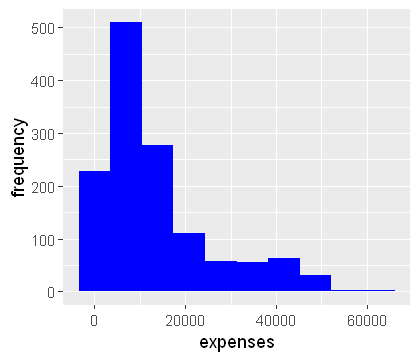

In [11]:
#check expenses
summary(insurance$expenses)
#plot histogram
ggplot(insurance, aes(expenses)) + geom_histogram(fill = 'blue', bins = 10) +
       xlab('expenses') + ylab('frequency')

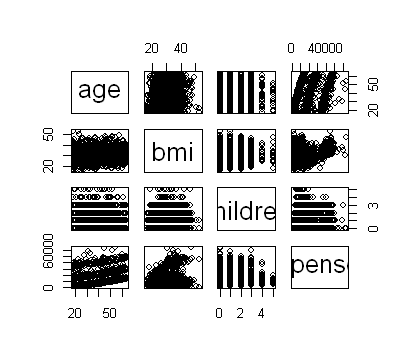

In [12]:
pairs(insurance[c("age", "bmi", "children", "expenses")])

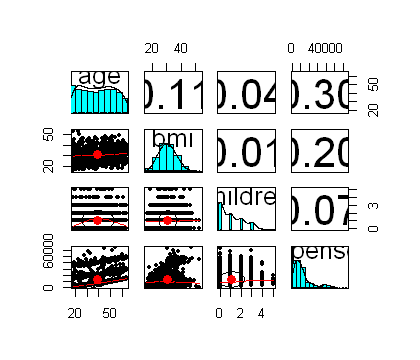

In [17]:
pairs.panels(insurance[c("age", "bmi", "children", "expenses")])

In [18]:
ins_model <- lm(expenses ~ age + children + bmi + sex +smoker + region, data = insurance)

In [19]:
summary(ins_model)


Call:
lm(formula = expenses ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
bmi                339.3       28.6  11.864  < 2e-16 ***
sexmale           -131.3      332.9  -0.395 0.693255    
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 

In [21]:
insurance$age2 <- insurance$age^2
insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)

In [22]:
ins_model2 <- lm(expenses ~ age + age2 + children + bmi + sex +bmi30*smoker + region, data = insurance)

In [23]:
summary(ins_model2)


Call:
lm(formula = expenses ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17297.1  -1656.0  -1262.7   -727.8  24161.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       139.0053  1363.1359   0.102 0.918792    
age               -32.6181    59.8250  -0.545 0.585690    
age2                3.7307     0.7463   4.999 6.54e-07 ***
children          678.6017   105.8855   6.409 2.03e-10 ***
bmi               119.7715    34.2796   3.494 0.000492 ***
sexmale          -496.7690   244.3713  -2.033 0.042267 *  
bmi30            -997.9355   422.9607  -2.359 0.018449 *  
smokeryes       13404.5952   439.9591  30.468  < 2e-16 ***
regionnorthwest  -279.1661   349.2826  -0.799 0.424285    
regionsoutheast  -828.0345   351.6484  -2.355 0.018682 *  
regionsouthwest -1222.1619   350.5314  -3.487 0.000505 ***
bmi30:smokeryes 19810.1534   604.6769  32.762  < 2e-16 ***

## Regression trees and model trees

In [16]:
library(ggplot2)
library(repr)
library(gmodels)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions
library(rpart) # for regression trees
library(rpart.plot) #for viewing regression trees
library(RWeka)

In [17]:
wine <- read.csv("whitewines.csv")

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  6.7 5.7 5.9 5.3 6.4 7 7.9 6.6 7 6.5 ...
 $ volatile.acidity    : num  0.62 0.22 0.19 0.47 0.29 0.14 0.12 0.38 0.16 0.37 ...
 $ citric.acid         : num  0.24 0.2 0.26 0.1 0.21 0.41 0.49 0.28 0.3 0.33 ...
 $ residual.sugar      : num  1.1 16 7.4 1.3 9.65 0.9 5.2 2.8 2.6 3.9 ...
 $ chlorides           : num  0.039 0.044 0.034 0.036 0.041 0.037 0.049 0.043 0.043 0.027 ...
 $ free.sulfur.dioxide : num  6 41 33 11 36 22 33 17 34 40 ...
 $ total.sulfur.dioxide: num  62 113 123 74 119 95 152 67 90 130 ...
 $ density             : num  0.993 0.999 0.995 0.991 0.993 ...
 $ pH                  : num  3.41 3.22 3.49 3.48 2.99 3.25 3.18 3.21 2.88 3.28 ...
 $ sulphates           : num  0.32 0.46 0.42 0.54 0.34 0.43 0.47 0.47 0.47 0.39 ...
 $ alcohol             : num  10.4 8.9 10.1 11.2 10.9 ...
 $ quality             : int  5 6 6 4 6 6 6 6 6 7 ...


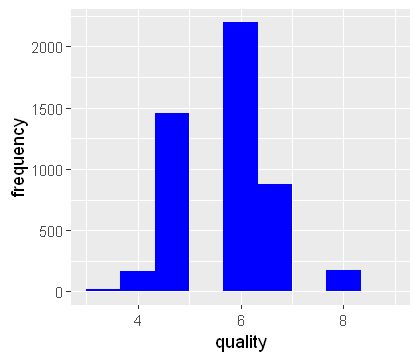

In [18]:
str(wine)
ggplot(wine, aes(quality)) + geom_histogram(fill = 'blue', bins = 10) +
       xlab('quality') + ylab('frequency')

In [19]:
wine_train <- wine[1:3750, ]
wine_test <- wine[3751:4898, ]

In [20]:
m.rpart <- rpart(quality ~ ., data = wine_train)

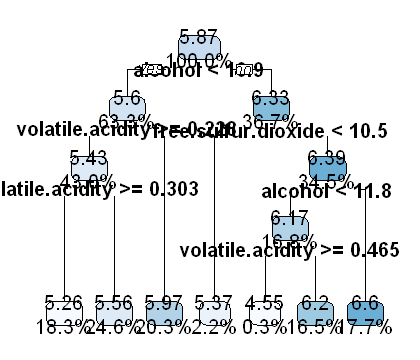

In [21]:
rpart.plot(m.rpart, digits = 3)

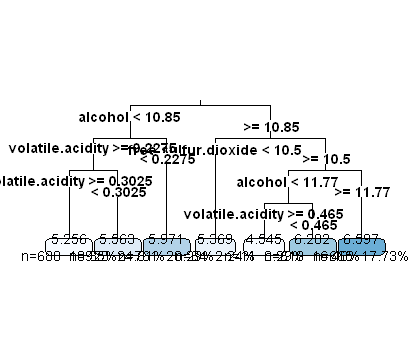

In [22]:
rpart.plot(m.rpart, digits = 4, fallen.leaves = TRUE,
type = 3, extra = 101)

In [23]:
p.rpart <- predict(m.rpart, wine_test)

In [24]:
summary(p.rpart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.545   5.563   5.971   5.893   6.202   6.597 

In [25]:
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.901   6.000   9.000 

In [26]:
MAE <- function(actual, predicted) { #mean absolute error to measure performance
    mean(abs(actual - predicted))
}

In [27]:
MAE(p.rpart, wine_test$quality)

[1] 0.5872652

In [28]:
m.m5p <- M5P(quality ~ ., data = wine_train)

In [30]:
summary(m.m5p)


=== Summary ===

Correlation coefficient                  0.6666
Mean absolute error                      0.5151
Root mean squared error                  0.6614
Relative absolute error                 76.4921 %
Root relative squared error             74.6259 %
Total Number of Instances             3750     

In [31]:
p.m5p <- predict(m.m5p, wine_test)

In [32]:
summary(p.m5p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.389   5.430   5.863   5.874   6.305   7.437 

In [33]:
cor(p.m5p, wine_test$quality)

[1] 0.6272973

In [34]:
MAE(wine_test$quality, p.m5p)

[1] 0.5463023